In [1]:
import sys
sys.path.append("../src/")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import tqdm
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
#reading all the files

#reading the first file
df = pd.read_csv('../src/outputs/run_history_19.csv', sep=';', index_col=0)
df_emb = pd.read_csv('../src/outputs/run_history_emb_idx_19.csv', sep=';', index_col=0)
np_emb_state = np.load('../src/outputs/emb_states_19.npy', allow_pickle=True)
np_emb_next_state = np.load('../src/outputs/next_states_19.npy', allow_pickle=True)

skeeped_files = []
#adding all the others
list1 = list(range(39, 5000, 20))
for i in tqdm.tqdm(list1):
    s1 = '../src/outputs/run_history_' + str(i) + '.csv'
    df_ = pd.read_csv(s1, sep=';', index_col=0)
    s2 = '../src/outputs/emb_states_' + str(i) + '.npy'
    np_emb_state_ = np.load(s2, allow_pickle=True)
    if np_emb_state_.shape[0] != df_.shape[0]:
        print ('skeeping file %d' %i)
        skeeped_files.append(s1)
        skeeped_files.append(s2)
    else:
        df = pd.concat([df,df_], axis=0)
        np_emb_state = np.concatenate((np_emb_state, np_emb_state_))
        
print(df.shape)
print(np_emb_state.shape)

 33%|████████████████████████████████▏                                                                  | 81/249 [00:00<00:01, 134.96it/s]

skeeping file 1439


 87%|█████████████████████████████████████████████████████████████████████████████████████             | 216/249 [00:01<00:00, 103.37it/s]

skeeping file 3979


100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 249/249 [00:02<00:00, 114.52it/s]

skeeping file 4659
skeeping file 4699
(120311, 8)
(120311,)


In [11]:
df.shape

(120311, 8)

In [13]:
df[df['reward'] >= 0].head()

,episode,step,original_payload,state,action,next_state,reward,win
129,5,10,or 1 = 1 /*,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n1\t#_4v7...,7,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n0x1\t#_4...,0.0,1
183,7,24,""" ) or benchmark ( 10000000,MD5 ( 1 ) ) #""","""\t )\t \t or\t benchmark\t (\t 0x989680...",9,"""\t \t )\t \t \t \t or\t \t benchmark\t \t (\t...",0.0,1
224,9,11,or pg_sleep ( __TIME__ ) --,\n\n \n ||\n \n\n pg_sleep\n\n (\n\n __TIME__\...,14,\n\n#p7D$y2\n\n#p7D$y2\n||\n#p7D$y2\n\n\n#p7D$...,0.0,1
287,12,3,a' or 'a' = 'a,a' or 'a' = 'a,12,a' or 'a' = 'a,0.0,1
298,13,11,or 1 = 1/*,or\n\t \n 0x1\n\t \n =\n\t \n 0x1/*,14,or\n\t \n#7IM6ta\n0x1\n\t \n#7IM6ta\n=\n\t \n#...,0.0,1


In [14]:
df[df['episode'] == 5]

,episode,step,original_payload,state,action,next_state,reward,win
120,5,1,or 1 = 1 /*,or 1 = 1 /*,9,\t or\t 1\t =\t 1\t /*,-0.176471,0
121,5,2,or 1 = 1 /*,\t or\t 1\t =\t 1\t /*,6,\t || \t 1\t =\t 1\t /*,-0.157895,0
122,5,3,or 1 = 1 /*,\t || \t 1\t =\t 1\t /*,14,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n1\t#_4v7...,-0.049180,0
123,5,4,or 1 = 1 /*,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n1\t#_4v7...,16,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n1\t#_4v7...,-0.047619,0
124,5,5,or 1 = 1 /*,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n1\t#_4v7...,18,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n1\t#_4v7...,-0.047619,0
125,5,6,or 1 = 1 /*,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n1\t#_4v7...,4,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n1\t#_4v7...,-0.047619,0
126,5,7,or 1 = 1 /*,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n1\t#_4v7...,12,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n1\t#_4v7...,-0.047619,0
127,5,8,or 1 = 1 /*,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n1\t#_4v7...,23,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n1\t#_4v7...,-0.047619,0
128,5,9,or 1 = 1 /*,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n1\t#_4v7...,19,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n1\t#_4v7...,-0.047619,0
129,5,10,or 1 = 1 /*,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n1\t#_4v7...,7,\t#_4v7;\n#_4v7;\n||#_4v7;\n\t#_4v7;\n0x1\t#_4...,0.000000,1


In [15]:
np_emb_state.shape

(120311,)

In [16]:
np_emb_state_2 = np.array([np.float32(x) for x in np_emb_state])
sqli_labels = [x.replace('\n', '') for x in df['state']]

In [17]:
np_emb_state[0].shape

(768,)

In [18]:
actions = [x for x in df['action']]
print(actions[0:10])
a_t = torch.Tensor(actions).to(torch.int64)
print(a_t)

[5, 11, 22, 14, 16, 10, 6, 23, 7, 22]
tensor([ 5, 11, 22,  ...,  0,  9, 17])


In [19]:
actions_one_hot = torch.nn.functional.one_hot(a_t)

In [20]:
# actions_one_hot = torch.stack(actions_one_hot)
actions_one_hot.size()

torch.Size([120311, 26])

In [22]:
from torch.utils.data import TensorDataset, DataLoader

stacked = np.stack(np_emb_state)
print(stacked.shape)

t_emb = torch.from_numpy(stacked)
print(t_emb.size())



(120311, 768)
torch.Size([120311, 768])


In [23]:
t_x = torch.cat([t_emb, actions_one_hot], dim=1)
print(t_x.size())


torch.Size([120311, 794])


In [24]:
t_x[0:2]

tensor([[ 0.1094, -0.1472,  0.0592,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0161, -0.1719,  0.0004,  ...,  0.0000,  0.0000,  0.0000]])

In [25]:
t_y = df['reward']
t_y = [np.float32(x) for x in t_y]
t_y = torch.Tensor(t_y).to(torch.float32)
print(t_y)

tensor([-0.5500, -0.3069, -0.3069,  ..., -0.1386, -0.1386, -0.1386])


In [26]:
class SQLiDataset(torch.utils.data.Dataset):

    def __init__(self, X, y, scale_data=True):
        if not torch.is_tensor(X) and not torch.is_tensor(y):
          # Apply scaling if necessary
            if scale_data:
                X = StandardScaler().fit_transform(X)
            self.X = torch.from_numpy(X)
            self.y = torch.from_numpy(y)
        if torch.is_tensor(X) and torch.is_tensor(y):
            if scale_data:
                self.X = torch.nn.functional.normalize(X)
                self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

In [27]:
df_dataset = SQLiDataset(t_x,t_y) # create your datset


In [28]:
df_dataset[0]

(tensor([ 8.9135e-03, -1.1994e-02,  4.8261e-03,  9.3226e-03, -4.1403e-03,
          6.8956e-03,  3.9776e-03, -3.4922e-03, -3.3229e-03,  1.2774e-03,
         -1.0768e-02,  7.5708e-03, -2.6476e-03, -5.3864e-03,  1.3389e-02,
          1.8549e-03, -4.5513e-03,  2.9522e-04,  7.6157e-05,  3.4239e-02,
          4.0677e-03,  6.1225e-03,  1.4116e-02,  1.6052e-02,  3.0476e-03,
         -6.2364e-03,  1.1040e-02,  8.7627e-03, -2.9484e-03,  7.3100e-03,
         -9.3912e-04,  1.0356e-02,  2.8313e-03,  3.3876e-03,  1.8020e-02,
          3.0558e-03,  1.0647e-02,  3.7290e-03, -1.4121e-03,  7.9860e-03,
         -5.8115e-03, -2.3613e-02,  7.8835e-04, -6.0830e-04,  8.4837e-03,
          2.2791e-03, -3.8470e-03,  1.7585e-02, -2.2578e-03, -2.8194e-03,
         -7.6310e-03,  1.9595e-02, -2.4882e-03,  4.3158e-03, -1.8691e-03,
          6.1549e-03,  2.7975e-03, -2.6485e-02,  1.1718e-02,  3.2001e-03,
         -3.9486e-04,  3.1121e-02, -2.6385e-02,  5.9752e-03,  4.8823e-03,
          2.8520e-03, -4.3057e-03, -7.

In [29]:
train_set, val_set = torch.utils.data.random_split(df_dataset, [0.7, 0.3], generator=torch.Generator().manual_seed(42))

In [30]:
print(len(df_dataset))
print(len(train_set))
print(len(val_set))

120311
84218
36093


In [31]:
rewards = df['reward']

<AxesSubplot: >

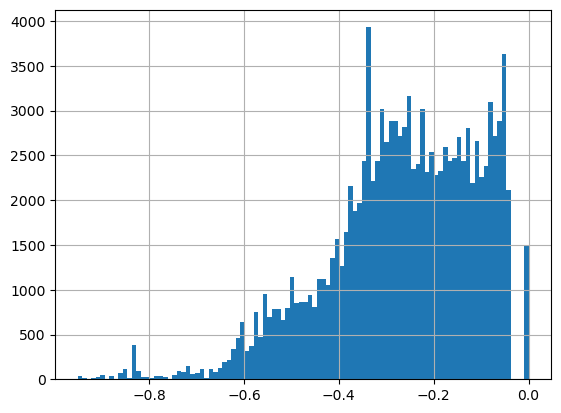

In [32]:
rewards.hist(bins=100)

In [41]:
rewards.describe()

count    120311.000000
mean         -0.266329
std           0.158993
min          -0.950000
25%          -0.355556
50%          -0.251613
75%          -0.139073
max           0.000000
Name: reward, dtype: float64

In [90]:
rew_ = df[df['reward'] >= -0.04]
rew_ = rew_[rew_['reward'] < 0]
len(rew_)

0

In [ ]:
# todos los que son mayores del -0.04 ya son 0

In [33]:
class SimpleNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.hid1 = torch.nn.Linear(794, 128)  
        self.hid2 = torch.nn.Linear(128, 32)
        self.oupt = torch.nn.Linear(32, 1)

        torch.nn.init.xavier_uniform_(self.hid1.weight)
        torch.nn.init.zeros_(self.hid1.bias)
        torch.nn.init.xavier_uniform_(self.hid2.weight)
        torch.nn.init.zeros_(self.hid2.bias)
        torch.nn.init.xavier_uniform_(self.oupt.weight)
        torch.nn.init.zeros_(self.oupt.bias)

    def forward(self, x):
        z = torch.relu(self.hid1(x))
        z = torch.relu(self.hid2(z))
        z = self.oupt(z)  # no activation
        return z

In [36]:
from tqdm.notebook import tqdm
# Initialize the MLP
mlp = SimpleNet()

lr = 1e-5
n_epochs = 100
batch_size = 10

trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

# Define the loss function and optimizer
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=lr)
  
# Run the training loop
for epoch in range(n_epochs): 
    mlp.train()
    print('Starting epoch %d' %epoch)
    
    # Set current loss value
    current_loss = 0.0
    epoch_losses = []
    
    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):
      
        
      # Get and prepare inputs
        inputs, targets = data
        # inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))
      
      # Zero the gradients
        optimizer.zero_grad()
      
      # Perform forward pass
        outputs = mlp(inputs)
      
      # Compute loss
        loss = loss_function(outputs, targets)
      
      # Perform backward pass
        loss.backward()
      
      # Perform optimization
        optimizer.step()
      
      # Print statistics
        current_loss += loss.item()
        if i % 100 == 0:
            current_loss = current_loss/(100*batch_size)
            epoch_losses.append(current_loss)
            #print('Loss after mini-batch %5d: %.10f' %
            #    (i + 1, current_loss))
            current_loss = 0.0
                  
    e_l_m =  np.mean(epoch_losses)
    print('Avg. loss for epoch %d %.10f' %(epoch, e_l_m))
    history.append(e_l_m)
    print('Avg. loss for all epochs at epoch %d %.10f' %(epoch, np.mean(history)))

# Process is complete.
print('Training process has finished.')

Starting epoch 0
Avg. loss for epoch 0 0.0017571348
Avg. loss for all epochs at epoch 0 0.0017571348
Starting epoch 1
Avg. loss for epoch 1 0.0008662019
Avg. loss for all epochs at epoch 1 0.0013116683
Starting epoch 2
Avg. loss for epoch 2 0.0007263767
Avg. loss for all epochs at epoch 2 0.0011165711
Starting epoch 3
Avg. loss for epoch 3 0.0006500289
Avg. loss for all epochs at epoch 3 0.0009999355
Starting epoch 4
Avg. loss for epoch 4 0.0005982640
Avg. loss for all epochs at epoch 4 0.0009196012
Starting epoch 5
Avg. loss for epoch 5 0.0005587655
Avg. loss for all epochs at epoch 5 0.0008594619
Starting epoch 6
Avg. loss for epoch 6 0.0005279081
Avg. loss for all epochs at epoch 6 0.0008120971
Starting epoch 7
Avg. loss for epoch 7 0.0005005663
Avg. loss for all epochs at epoch 7 0.0007731558
Starting epoch 8
Avg. loss for epoch 8 0.0004772049
Avg. loss for all epochs at epoch 8 0.0007402723
Starting epoch 9
Avg. loss for epoch 9 0.0004562637
Avg. loss for all epochs at epoch 9 0.0

Avg. loss for epoch 79 0.0001796318
Avg. loss for all epochs at epoch 79 0.0003061724
Starting epoch 80
Avg. loss for epoch 80 0.0001786853
Avg. loss for all epochs at epoch 80 0.0003045985
Starting epoch 81
Avg. loss for epoch 81 0.0001780225
Avg. loss for all epochs at epoch 81 0.0003030549
Starting epoch 82
Avg. loss for epoch 82 0.0001770823
Avg. loss for all epochs at epoch 82 0.0003015372
Starting epoch 83
Avg. loss for epoch 83 0.0001764122
Avg. loss for all epochs at epoch 83 0.0003000476
Starting epoch 84
Avg. loss for epoch 84 0.0001755471
Avg. loss for all epochs at epoch 84 0.0002985829
Starting epoch 85
Avg. loss for epoch 85 0.0001746143
Avg. loss for all epochs at epoch 85 0.0002971414
Starting epoch 86
Avg. loss for epoch 86 0.0001741017
Avg. loss for all epochs at epoch 86 0.0002957271
Starting epoch 87
Avg. loss for epoch 87 0.0001731776
Avg. loss for all epochs at epoch 87 0.0002943345
Starting epoch 88
Avg. loss for epoch 88 0.0001720799
Avg. loss for all epochs at 

In [37]:
mlp.eval()

SimpleNet(
  (hid1): Linear(in_features=794, out_features=128, bias=True)
  (hid2): Linear(in_features=128, out_features=32, bias=True)
  (oupt): Linear(in_features=32, out_features=1, bias=True)
)

In [50]:
batch_size = 1
testloader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=0)

In [51]:
losses_val = []

# Iterate over the DataLoader for training data
for i, data in enumerate(testloader, 0):
              
    # Get and prepare inputs
    inputs, targets = data
    # inputs, targets = inputs.float(), targets.float()
    targets = targets.reshape((targets.shape[0], 1))
      
    # Perform forward pass
    outputs = mlp(inputs)
      
    # Compute loss
    loss = loss_function(outputs, targets)
      
    # Print statistics
    current_loss += loss.item()
    if i % 100 == 0:
        current_loss = current_loss/(100*batch_size)
        losses_val.append(current_loss)
        current_loss = 0.0
                  
l_m_val =  np.mean(losses_val)
print('Avg. loss for all validation %.10f' %l_m_val) 


Avg. loss for all validation 0.0018479266


In [76]:
losses = []
outputs_all = []
targets_all = []
for i,data in enumerate(testloader):
    # Get and prepare inputs
    inputs, targets = data
    # inputs, targets = inputs.float(), targets.float()
    targets = targets.reshape((targets.shape[0], 1))
      
    # Perform forward pass
    outputs = mlp(inputs)
    outputs_all.append(outputs[0].detach().numpy())
    targets_all.append(targets[0].detach().numpy())
      
    # Compute loss
    loss = loss_function(outputs, targets)
    if targets >= -0.01:
        losses.append(loss.detach().numpy())
        print("Outputs %.10f" %outputs)
        print("Target %.10f" %targets)
        print("Loss %.10f" %loss)
        print("---------------------------")
    
print("Avg. Loss for targets >= -0.01: %.10f" %np.mean(losses))

Outputs -0.0786077380
Target 0.0000000000
Loss 0.0061791763
---------------------------
Outputs -0.0555129535
Target 0.0000000000
Loss 0.0030816880
---------------------------
Outputs -0.0513866879
Target 0.0000000000
Loss 0.0026405917
---------------------------
Outputs -0.0337302946
Target 0.0000000000
Loss 0.0011377328
---------------------------
Outputs -0.0702230930
Target 0.0000000000
Loss 0.0049312827
---------------------------
Outputs -0.1896830052
Target 0.0000000000
Loss 0.0359796435
---------------------------
Outputs 0.0511640869
Target 0.0000000000
Loss 0.0026177638
---------------------------
Outputs -0.0609757639
Target 0.0000000000
Loss 0.0037180437
---------------------------
Outputs -0.1450635046
Target 0.0000000000
Loss 0.0210434198
---------------------------
Outputs -0.0985656679
Target 0.0000000000
Loss 0.0097151911
---------------------------
Outputs -0.0350415446
Target 0.0000000000
Loss 0.0012279098
---------------------------
Outputs -0.0806966871
Target 0.00

Outputs -0.0813704431
Target 0.0000000000
Loss 0.0066211489
---------------------------
Outputs -0.0964433998
Target 0.0000000000
Loss 0.0093013290
---------------------------
Outputs -0.0402009375
Target 0.0000000000
Loss 0.0016161153
---------------------------
Outputs -0.0366102569
Target 0.0000000000
Loss 0.0013403109
---------------------------
Outputs -0.1845441461
Target 0.0000000000
Loss 0.0340565406
---------------------------
Outputs -0.1099269539
Target 0.0000000000
Loss 0.0120839356
---------------------------
Outputs -0.0549062602
Target 0.0000000000
Loss 0.0030146975
---------------------------
Outputs 0.0012062900
Target 0.0000000000
Loss 0.0000014551
---------------------------
Outputs -0.0934914798
Target 0.0000000000
Loss 0.0087406570
---------------------------
Outputs -0.0583140664
Target 0.0000000000
Loss 0.0034005304
---------------------------
Outputs 0.0008242801
Target 0.0000000000
Loss 0.0000006794
---------------------------
Outputs -0.0546356402
Target 0.000

Outputs -0.0930417776
Target 0.0000000000
Loss 0.0086567728
---------------------------
Outputs -0.1446899474
Target 0.0000000000
Loss 0.0209351815
---------------------------
Outputs 0.0074344538
Target 0.0000000000
Loss 0.0000552711
---------------------------
Outputs -0.0446694084
Target 0.0000000000
Loss 0.0019953561
---------------------------
Outputs -0.0801590681
Target 0.0000000000
Loss 0.0064254762
---------------------------
Outputs -0.0262369029
Target 0.0000000000
Loss 0.0006883751
---------------------------
Outputs -0.0585258715
Target 0.0000000000
Loss 0.0034252775
---------------------------
Outputs -0.1652903557
Target 0.0000000000
Loss 0.0273209009
---------------------------
Outputs -0.0519448407
Target 0.0000000000
Loss 0.0026982664
---------------------------
Outputs -0.0728551596
Target 0.0000000000
Loss 0.0053078742
---------------------------
Outputs -0.0479389466
Target 0.0000000000
Loss 0.0022981425
---------------------------
Outputs -0.0241548680
Target 0.00

Outputs -0.1521320790
Target 0.0000000000
Loss 0.0231441688
---------------------------
Outputs 0.0275497846
Target 0.0000000000
Loss 0.0007589906
---------------------------
Outputs -0.0543574728
Target 0.0000000000
Loss 0.0029547350
---------------------------
Outputs -0.1524166316
Target 0.0000000000
Loss 0.0232308302
---------------------------
Outputs 0.0160601176
Target 0.0000000000
Loss 0.0002579274
---------------------------
Outputs -0.0865958482
Target 0.0000000000
Loss 0.0074988408
---------------------------
Outputs -0.0589680262
Target 0.0000000000
Loss 0.0034772281
---------------------------
Outputs -0.0439660810
Target 0.0000000000
Loss 0.0019330162
---------------------------
Outputs -0.0947232544
Target 0.0000000000
Loss 0.0089724949
---------------------------
Outputs -0.0691557527
Target 0.0000000000
Loss 0.0047825179
---------------------------
Outputs -0.0411849059
Target 0.0000000000
Loss 0.0016961965
---------------------------
Outputs -0.1158810705
Target 0.000

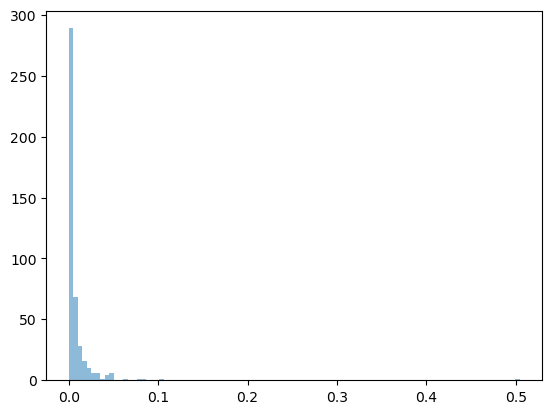

In [71]:
plt.hist(losses, bins=100, alpha=0.5)
plt.show()

In [78]:
from sklearn.metrics import r2_score

print(r2_score(outputs_all, targets_all))


0.9197503541279318
